In [5]:
#Import des 1ère bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# %matplotlib inline permet d'afficher le graphique directement sans avoir à rentrer plt.show()
%matplotlib inline  
plt.style.use('seaborn-v0_8')

In [6]:
#Import du dataset
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

In [7]:
#Affichage des 1ères lignes du dataset
df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [8]:
#Vérifier le type de chaque variable, présence ou non de valeur nulle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [9]:
#Statistique descriptive rapide
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


In [10]:
#Vérifier le nombre de valeur nulle (même si vu plus haut qu'il y'en avait pas)
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [11]:
#Vérifier si présence de doublons
df.duplicated().sum()

np.int64(0)

In [12]:
#Nombre de valeur unique de chaque variable
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [13]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col} — {len(uniques)} valeurs uniques")
    print(uniques)
    print("-" * 60)


Model — 11 valeurs uniques
['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']
------------------------------------------------------------
Year — 15 valeurs uniques
[2016 2013 2022 2024 2020 2017 2014 2019 2012 2015 2011 2021 2023 2010
 2018]
------------------------------------------------------------
Region — 6 valeurs uniques
['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
------------------------------------------------------------
Color — 6 valeurs uniques
['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']
------------------------------------------------------------
Fuel_Type — 4 valeurs uniques
['Petrol' 'Hybrid' 'Diesel' 'Electric']
------------------------------------------------------------
Transmission — 2 valeurs uniques
['Manual' 'Automatic']
------------------------------------------------------------
Engine_Size_L — 36 valeurs uniques
[3.5 1.6 4.5 1.7 2.1 1.9 1.8 3.  2.4 3.8 2.3 2.6 3.1 3.7 4.8 3.3 3.2 2.2
 4.1 2.  4.7 4.3 4.  

### KPIs ventes

In [15]:
#Evolution des ventes selon les années, tout modèle confondu

evolution_ventes = df.groupby('Year')['Sales_Volume'].sum().reset_index()
print(evolution_ventes)

    Year  Sales_Volume
0   2010      16933445
1   2011      16758941
2   2012      16751895
3   2013      16866733
4   2014      16958960
5   2015      17010207
6   2016      16957550
7   2017      16620811
8   2018      16412273
9   2019      17191956
10  2020      16310843
11  2021      16884666
12  2022      17920946
13  2023      16268654
14  2024      17527854


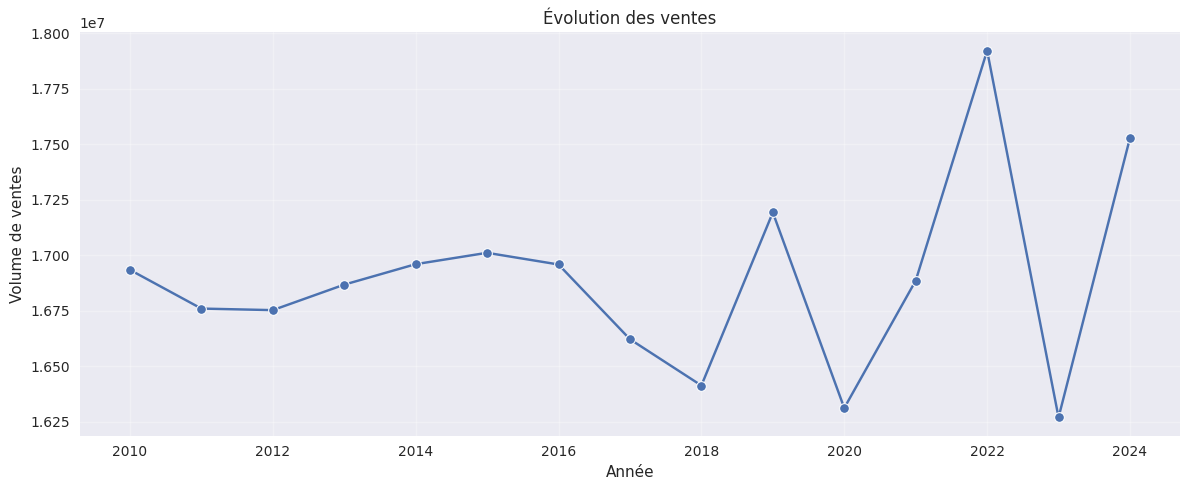

In [16]:
#Graphe évolution des ventes

plt.figure(figsize=(12,5))
sns.lineplot(data=evolution_ventes, x='Year', y='Sales_Volume', marker='o')
plt.title("Évolution des ventes")
plt.xlabel("Année"); plt.ylabel("Volume de ventes")
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

In [17]:
# Ranking des modèle selon les ventes 
top_models=(
    df.groupby('Model')['Sales_Volume']
      .sum()
      .reset_index()
      .sort_values('Sales_Volume', ascending=False)
)

print(top_models)

       Model  Sales_Volume
2   7 Series      23786466
10        i8      23423891
5         X1      23406060
0   3 Series      23281303
9         i3      23133849
1   5 Series      23097519
4         M5      22779688
6         X3      22745529
7         X5      22709749
8         X6      22661986
3         M3      22349694
